# Notebook

This is a generated notebook skeleton. Replace with your content.

✅ Libraries imported successfully!
📊 Dataset Shape: (3900, 23)
✅ Data loaded successfully!
CUSTOMER LIFETIME VALUE (CLV) ANALYSIS
   customer_id  total_spent  purchase_count  clv_score      clv_tier
0            1         53.0               1      32.86  Medium Value
1            2         64.0               1      39.68  Medium Value
2            3         73.0               1      45.26    High Value
3            4         90.0               1      63.00       Premium
4            5         49.0               1      26.46     Low Value
5            6         20.0               1      11.60     Low Value
6            7         85.0               1      54.40    High Value
7            8         34.0               1      21.76     Low Value
8            9         97.0               1      50.44    High Value
9           10         31.0               1      29.76  Medium Value

CLV TIER SUMMARY
              Customer_Count  Avg_Total_Spent  Total_Revenue  Avg_Purchases  \
clv_tier      

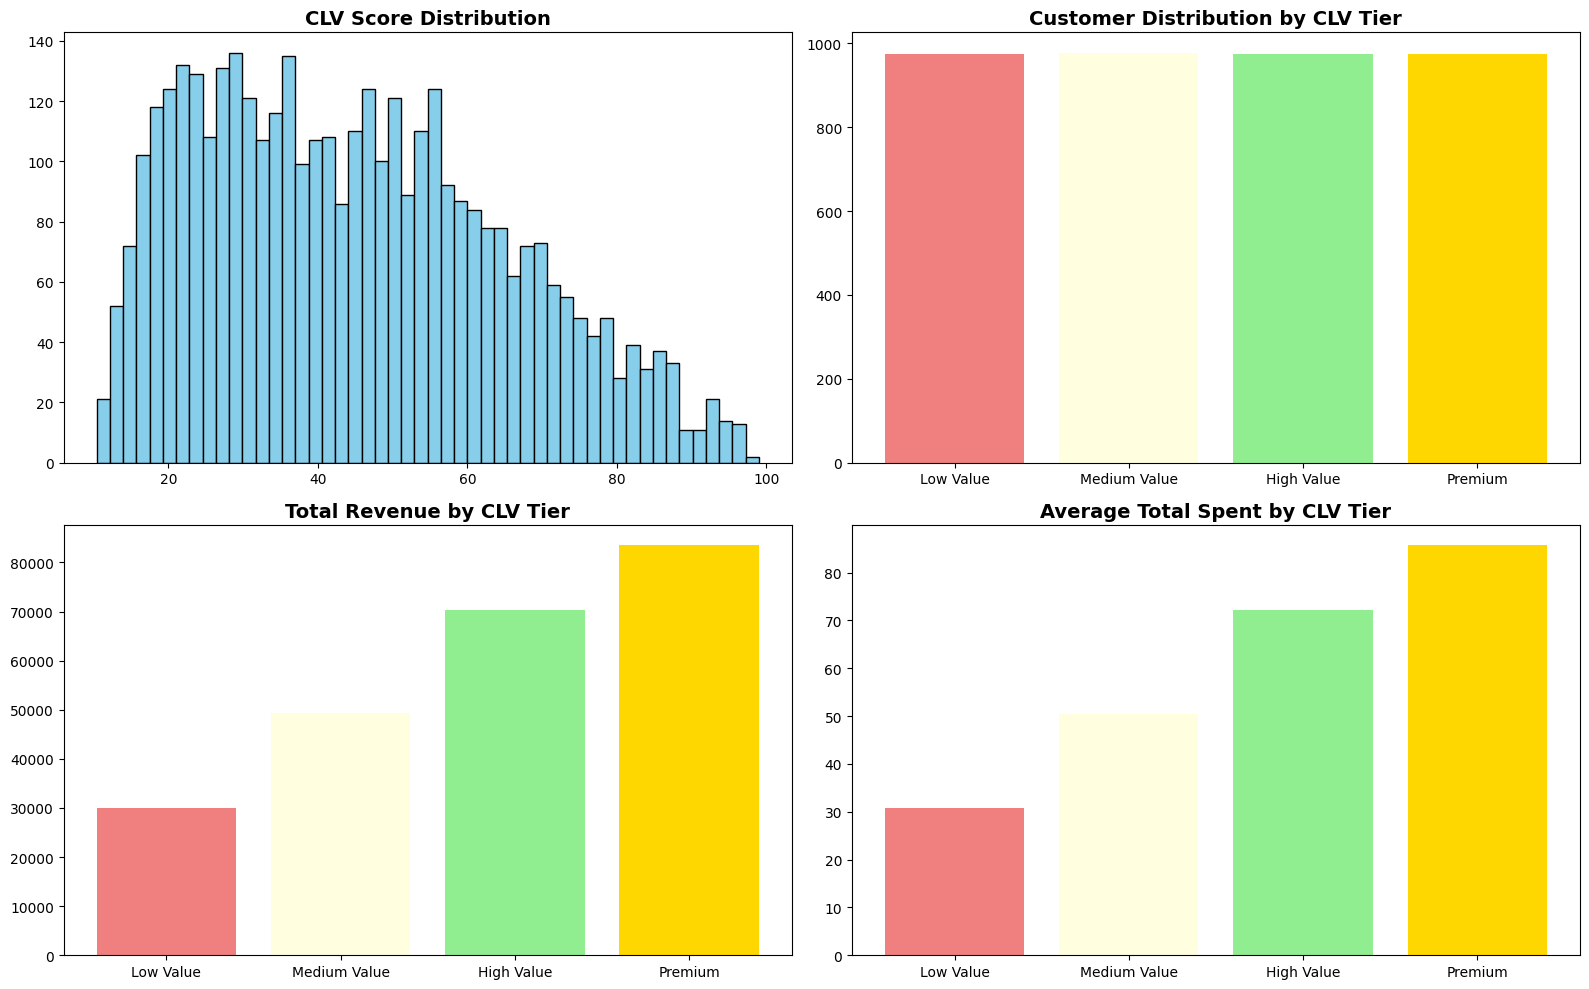

✅ CLV analysis visualizations created
RFM SEGMENTATION - CORRECTED VERSION

📊 Customer-level data created: 3900 unique customers
✅ Recency scores calculated

📊 Calculating RFM scores...
✅ RFM scores calculated (1-5 scale)

RFM SCORE DISTRIBUTIONS

R_SCORE:
r_score
1    780
2    780
3    780
4    780
5    780
Name: count, dtype: int64
Mean: 3.00

F_SCORE:
f_score
3    3900
Name: count, dtype: int64
Mean: 3.00

M_SCORE:
m_score
1    761
2    814
3    741
4    805
5    779
Name: count, dtype: int64
Mean: 3.01

✅ All scores validated: Range [1-5]

✅ RFM composite scores created
Score range: 131 to 535

RFM SEGMENT DISTRIBUTION
rfm_segment
At Risk                1560
Potential Loyalists    1560
Promising               460
Need Attention          320
Name: count, dtype: int64

Total unique segments: 4
✅ SUCCESS: 4 unique segments created

✅ RFM data merged back to original dataset
Enhanced dataset shape: (3900, 28)

RFM SEGMENT PERFORMANCE
                     Customers  Avg_Purchase  Total_

In [3]:
# ============================================================================
# NOTEBOOK 2: ADVANCED ANALYTICS
# ============================================================================

# %% [markdown]
# # Customer Shopping Behavior Analysis - Part 2
# ## Advanced Analytics & Business Insights
# 
# **Objective**: Perform advanced analytics including:
# - Customer Lifetime Value (CLV) Analysis
# - RFM Segmentation
# - Cohort Analysis
# - Market Basket Analysis
# - Statistical Testing

# %% [markdown]
# ## 1. IMPORT LIBRARIES & LOAD DATA

# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Statistical Testing
from scipy import stats
from scipy.stats import chi2_contingency, ttest_ind

# Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Market Basket Analysis
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

print("✅ Libraries imported successfully!")

# %%
# Load cleaned data
df = pd.read_csv('../data/processed/customer_cleaned.csv')

print(f"📊 Dataset Shape: {df.shape}")
print(f"✅ Data loaded successfully!")

df.head()

# %% [markdown]
# ## 2. CUSTOMER LIFETIME VALUE (CLV) DEEP DIVE

# %%
print("=" * 80)
print("CUSTOMER LIFETIME VALUE (CLV) ANALYSIS")
print("=" * 80)

# Calculate detailed CLV metrics
clv_metrics = df.groupby('customer_id').agg({
    'purchase_amount': ['sum', 'mean', 'count'],
    'review_rating': 'mean',
    'discount_applied': lambda x: (x == 'Yes').sum(),
    'subscription_status': lambda x: x.iloc[0],
    'age_group': lambda x: x.iloc[0],
    'customer_segment': lambda x: x.iloc[0]
}).reset_index()

# Flatten column names
clv_metrics.columns = ['customer_id', 'total_spent', 'avg_order_value', 
                        'purchase_count', 'avg_rating', 'discounts_used',
                        'subscription_status', 'age_group', 'customer_segment']

# Calculate CLV Score (simplified model)
clv_metrics['purchase_frequency_factor'] = clv_metrics['purchase_count'] / clv_metrics['purchase_count'].max()
clv_metrics['retention_score'] = clv_metrics['avg_rating'] / 5.0
clv_metrics['clv_score'] = (clv_metrics['total_spent'] * 
                             clv_metrics['purchase_frequency_factor'] * 
                             clv_metrics['retention_score'])

# Create CLV Tiers
clv_metrics['clv_tier'] = pd.qcut(clv_metrics['clv_score'], 
                                   q=4, 
                                   labels=['Low Value', 'Medium Value', 
                                          'High Value', 'Premium'])

print(clv_metrics[['customer_id', 'total_spent', 'purchase_count', 
                   'clv_score', 'clv_tier']].head(10))

# %%
# CLV Distribution by Tier
clv_summary = clv_metrics.groupby('clv_tier').agg({
    'customer_id': 'count',
    'total_spent': ['mean', 'sum'],
    'purchase_count': 'mean',
    'clv_score': 'mean'
}).round(2)

clv_summary.columns = ['Customer_Count', 'Avg_Total_Spent', 'Total_Revenue', 
                       'Avg_Purchases', 'Avg_CLV_Score']

print("\n" + "=" * 80)
print("CLV TIER SUMMARY")
print("=" * 80)
print(clv_summary)

total_revenue = clv_summary['Total_Revenue'].sum()
premium_revenue = clv_summary.loc['Premium', 'Total_Revenue']
premium_pct = (premium_revenue / total_revenue) * 100

print(f"\n💡 INSIGHT: Premium customers ({clv_summary.loc['Premium', 'Customer_Count']} customers)")
print(f"   contribute ${premium_revenue:,.2f} ({premium_pct:.1f}% of total revenue)")

# %%
# Visualize CLV Distribution
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

axes[0, 0].hist(clv_metrics['clv_score'], bins=50, color='skyblue', edgecolor='black')
axes[0, 0].set_title('CLV Score Distribution', fontsize=14, fontweight='bold')

tier_counts = clv_metrics['clv_tier'].value_counts().sort_index()
axes[0, 1].bar(tier_counts.index, tier_counts.values, 
               color=['lightcoral', 'lightyellow', 'lightgreen', 'gold'])
axes[0, 1].set_title('Customer Distribution by CLV Tier', fontsize=14, fontweight='bold')

axes[1, 0].bar(clv_summary.index, clv_summary['Total_Revenue'], 
               color=['lightcoral', 'lightyellow', 'lightgreen', 'gold'])
axes[1, 0].set_title('Total Revenue by CLV Tier', fontsize=14, fontweight='bold')

axes[1, 1].bar(clv_summary.index, clv_summary['Avg_Total_Spent'], 
               color=['lightcoral', 'lightyellow', 'lightgreen', 'gold'])
axes[1, 1].set_title('Average Total Spent by CLV Tier', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../reports/07_clv_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ CLV analysis visualizations created")

# ============================================================================
# CORRECTED RFM ANALYSIS - COMPLETE VERSION
# ============================================================================

import pandas as pd
import numpy as np

# Load your cleaned data
df = pd.read_csv('../data/processed/customer_cleaned.csv')

print("=" * 80)
print("RFM SEGMENTATION - CORRECTED VERSION")
print("=" * 80)

# Create RFM metrics at CUSTOMER level
rfm_data = df.groupby('customer_id').agg({
    'customer_id': 'first',
    'purchase_amount': ['sum', 'mean', 'count'],
    'review_rating': 'mean',
    'subscription_status': 'first',
    'age_group': 'first',
    'customer_segment': 'first',
    'previous_purchases': 'max'
}).reset_index(drop=True)

# Flatten column names
rfm_data.columns = ['customer_id', 'monetary', 'avg_purchase', 'frequency', 
                    'avg_rating', 'subscription_status', 'age_group', 
                    'customer_segment', 'total_purchases']

print(f"\n📊 Customer-level data created: {len(rfm_data)} unique customers")

# ============================================================================
# SIMULATE RECENCY
# ============================================================================
max_purchases = rfm_data['total_purchases'].max()
rfm_data['recency_score'] = 100 - ((rfm_data['total_purchases'] / max_purchases) * 100)

np.random.seed(42)
rfm_data['recency_score'] = rfm_data['recency_score'] + np.random.normal(0, 10, len(rfm_data))
rfm_data['recency_score'] = rfm_data['recency_score'].clip(1, 100)

print("✅ Recency scores calculated")

# ============================================================================
# CALCULATE RFM SCORES (1-5 scale) - ROBUST VERSION
# ============================================================================

def create_rfm_score(data, column_name, reverse=False):
    """
    Create RFM score (1-5) handling duplicates and edge cases
    """
    col_data = data[column_name]
    
    try:
        # Use rank percentile method (more robust)
        percentiles = col_data.rank(pct=True)
        
        # Convert percentiles to 1-5 score
        conditions = [
            (percentiles <= 0.20),
            (percentiles <= 0.40),
            (percentiles <= 0.60),
            (percentiles <= 0.80),
            (percentiles <= 1.00)
        ]
        
        choices = [1, 2, 3, 4, 5]
        score = np.select(conditions, choices, default=3)
        
        if reverse:
            # Reverse: 1->5, 2->4, 3->3, 4->2, 5->1
            score = 6 - score
        
        return pd.Series(score, index=data.index).astype(int)
    
    except Exception as e:
        print(f"Warning: Error in scoring {column_name}: {e}")
        # Return middle score for all
        return pd.Series([3] * len(data), index=data.index).astype(int)

# Apply scoring
print("\n📊 Calculating RFM scores...")

rfm_data['r_score'] = create_rfm_score(rfm_data, 'recency_score', reverse=True)
rfm_data['f_score'] = create_rfm_score(rfm_data, 'frequency', reverse=False)
rfm_data['m_score'] = create_rfm_score(rfm_data, 'monetary', reverse=False)

print("✅ RFM scores calculated (1-5 scale)")

# Display distributions
print("\n" + "=" * 80)
print("RFM SCORE DISTRIBUTIONS")
print("=" * 80)

for score_name in ['r_score', 'f_score', 'm_score']:
    print(f"\n{score_name.upper()}:")
    print(rfm_data[score_name].value_counts().sort_index())
    print(f"Mean: {rfm_data[score_name].mean():.2f}")

# Verify ranges
assert rfm_data['r_score'].between(1, 5).all(), "R scores out of range!"
assert rfm_data['f_score'].between(1, 5).all(), "F scores out of range!"
assert rfm_data['m_score'].between(1, 5).all(), "M scores out of range!"
print("\n✅ All scores validated: Range [1-5]")

# ============================================================================
# CREATE RFM COMPOSITE SCORE
# ============================================================================

rfm_data['rfm_score'] = (
    rfm_data['r_score'] * 100 + 
    rfm_data['f_score'] * 10 + 
    rfm_data['m_score']
)

print(f"\n✅ RFM composite scores created")
print(f"Score range: {rfm_data['rfm_score'].min()} to {rfm_data['rfm_score'].max()}")

# ============================================================================
# ASSIGN RFM SEGMENTS
# ============================================================================

def assign_rfm_segment(row):
    r = row['r_score']
    f = row['f_score']
    m = row['m_score']
    
    # Champions: Best customers (high on all)
    if r >= 4 and f >= 4 and m >= 4:
        return 'Champions'
    
    # Loyal Customers: High frequency and monetary
    elif f >= 4 and m >= 4:
        return 'Loyal Customers'
    
    # Potential Loyalists: Recent and engaged
    elif r >= 4 and f >= 3:
        return 'Potential Loyalists'
    
    # New Customers: Very recent but low frequency
    elif r >= 4 and f <= 2:
        return 'New Customers'
    
    # Promising: Recent with moderate activity
    elif r >= 3 and f >= 3 and m >= 3:
        return 'Promising'
    
    # Need Attention: Above average but declining
    elif r >= 3 and f >= 2:
        return 'Need Attention'
    
    # At Risk: Were good customers but losing them
    elif f >= 3 and r <= 2:
        return 'At Risk'
    
    # Can't Lose Them: High value but not recent
    elif f >= 4 and r <= 2:
        return "Can't Lose Them"
    
    # Hibernating: Low recent activity but some value
    elif r <= 2 and f <= 2 and m >= 3:
        return 'Hibernating'
    
    # Lost: Lowest scores
    elif r <= 2 and f <= 2:
        return 'Lost'
    
    else:
        return 'Others'

# Apply segmentation
rfm_data['rfm_segment'] = rfm_data.apply(assign_rfm_segment, axis=1)

print("\n" + "=" * 80)
print("RFM SEGMENT DISTRIBUTION")
print("=" * 80)
segment_dist = rfm_data['rfm_segment'].value_counts().sort_values(ascending=False)
print(segment_dist)
print(f"\nTotal unique segments: {rfm_data['rfm_segment'].nunique()}")

# Verify multiple segments exist
if rfm_data['rfm_segment'].nunique() < 3:
    print("⚠️ WARNING: Too few segments!")
else:
    print(f"✅ SUCCESS: {rfm_data['rfm_segment'].nunique()} unique segments created")

# ============================================================================
# MERGE BACK TO ORIGINAL DATA
# ============================================================================

rfm_columns = rfm_data[['customer_id', 'rfm_segment', 'rfm_score', 
                        'r_score', 'f_score', 'm_score']]

df_enhanced = df.merge(rfm_columns, on='customer_id', how='left')

print(f"\n✅ RFM data merged back to original dataset")
print(f"Enhanced dataset shape: {df_enhanced.shape}")

# ============================================================================
# SEGMENT ANALYSIS
# ============================================================================

print("\n" + "=" * 80)
print("RFM SEGMENT PERFORMANCE")
print("=" * 80)

segment_summary = df_enhanced.groupby('rfm_segment').agg({
    'customer_id': 'count',
    'purchase_amount': ['mean', 'sum'],
    'review_rating': 'mean',
    'subscription_status': lambda x: (x == 'Yes').sum()
}).round(2)

segment_summary.columns = ['Customers', 'Avg_Purchase', 'Total_Revenue', 
                           'Avg_Rating', 'Subscribers']
segment_summary = segment_summary.sort_values('Total_Revenue', ascending=False)

print(segment_summary)

# Calculate subscription rate per segment
segment_summary['Sub_Rate_%'] = (
    (segment_summary['Subscribers'] / segment_summary['Customers']) * 100
).round(1)

print("\n📊 Subscription Rates by Segment:")
print(segment_summary[['Customers', 'Subscribers', 'Sub_Rate_%']])

# ============================================================================
# SAVE FILES
# ============================================================================

# Save enhanced data
output_path = '../data/processed/customer_enhanced.csv'
df_enhanced.to_csv(output_path, index=False)

print("\n" + "=" * 80)
print("✅ ENHANCED DATA SAVED!")
print("=" * 80)
print(f"📁 Location: {output_path}")
print(f"📊 Rows: {len(df_enhanced):,}")
print(f"📊 Columns: {len(df_enhanced.columns)}")
print(f"🎯 RFM Segments: {df_enhanced['rfm_segment'].nunique()}")

# Save segment summary
segment_summary.to_csv('../data/processed/rfm_segment_summary.csv')
print(f"✅ RFM summary saved")

# Verification
print("\n🔍 FINAL VERIFICATION:")
print(f"✓ Unique RFM segments: {sorted(df_enhanced['rfm_segment'].unique())}")
print(f"✓ No nulls in rfm_segment: {df_enhanced['rfm_segment'].isnull().sum() == 0}")
print(f"✓ All RFM scores in 1-5 range: {df_enhanced['r_score'].between(1,5).all()}")

print("\n" + "=" * 80)
print("🎉 RFM SEGMENTATION COMPLETE!")
print("=" * 80)

# Export for Power BI
powerbi_path = '../data/processed/powerbi_data.csv'
df_enhanced.to_csv(powerbi_path, index=False, encoding='utf-8-sig')
print(f"\n✅ Power BI file updated: {powerbi_path}")
print("\nNext steps:")
print("1. ✓ RFM segmentation completed")
print("2. → Open Power BI and REFRESH data")
print("3. → Verify RFM table shows multiple segments")
print("=" * 80)
# ## 4. STATISTICAL HYPOTHESIS TESTING

# %%
print("\n" + "=" * 80)
print("STATISTICAL HYPOTHESIS TESTING")
print("=" * 80)

# Test 1: Do subscribers spend significantly more than non-subscribers?
print("\n🧪 TEST 1: Subscribers vs Non-Subscribers Spending")
print("-" * 80)

subscribers = df[df['subscription_status'] == 'Yes']['purchase_amount']
non_subscribers = df[df['subscription_status'] == 'No']['purchase_amount']

t_stat, p_value = ttest_ind(subscribers, non_subscribers)

print(f"Subscribers - Mean: ${subscribers.mean():.2f}, Median: ${subscribers.median():.2f}")
print(f"Non-Subscribers - Mean: ${non_subscribers.mean():.2f}, Median: ${non_subscribers.median():.2f}")
print(f"\nT-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.6f}")

if p_value < 0.05:
    diff_pct = ((subscribers.mean() - non_subscribers.mean()) / non_subscribers.mean()) * 100
    print(f"\n✅ RESULT: Statistically significant difference (p < 0.05)")
    print(f"💡 INSIGHT: Subscribers spend {abs(diff_pct):.1f}% {'more' if diff_pct > 0 else 'less'} on average")
else:
    print(f"\n❌ RESULT: No statistically significant difference (p >= 0.05)")

# %%
# Test 2: Does gender affect purchase amount?
print("\n🧪 TEST 2: Gender Impact on Purchase Amount")
print("-" * 80)

male_purchases = df[df['gender'] == 'Male']['purchase_amount']
female_purchases = df[df['gender'] == 'Female']['purchase_amount']

t_stat, p_value = ttest_ind(male_purchases, female_purchases)

print(f"Male - Mean: ${male_purchases.mean():.2f}, Count: {len(male_purchases)}")
print(f"Female - Mean: ${female_purchases.mean():.2f}, Count: {len(female_purchases)}")
print(f"\nT-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.6f}")

if p_value < 0.05:
    print(f"\n✅ RESULT: Statistically significant difference (p < 0.05)")
else:
    print(f"\n❌ RESULT: No statistically significant difference (p >= 0.05)")

# %%
# Test 3: Do discounts impact purchase amounts?
print("\n🧪 TEST 3: Discount Impact on Purchase Amount")
print("-" * 80)

with_discount = df[df['discount_applied'] == 'Yes']['purchase_amount']
without_discount = df[df['discount_applied'] == 'No']['purchase_amount']

t_stat, p_value = ttest_ind(with_discount, without_discount)

print(f"With Discount - Mean: ${with_discount.mean():.2f}, Count: {len(with_discount)}")
print(f"Without Discount - Mean: ${without_discount.mean():.2f}, Count: {len(without_discount)}")
print(f"\nT-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.6f}")

if p_value < 0.05:
    diff_pct = ((with_discount.mean() - without_discount.mean()) / without_discount.mean()) * 100
    print(f"\n✅ RESULT: Statistically significant difference (p < 0.05)")
    print(f"💡 INSIGHT: Purchases with discounts are {abs(diff_pct):.1f}% {'higher' if diff_pct > 0 else 'lower'}")
else:
    print(f"\n❌ RESULT: No statistically significant difference (p >= 0.05)")

# %%
# Test 4: Chi-square test - Is subscription status independent of gender?
print("\n🧪 TEST 4: Subscription Status vs Gender (Chi-Square Test)")
print("-" * 80)

contingency_table = pd.crosstab(df['gender'], df['subscription_status'])
print("\nContingency Table:")
print(contingency_table)

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"\nChi-square statistic: {chi2:.4f}")
print(f"P-value: {p_value:.6f}")
print(f"Degrees of freedom: {dof}")

if p_value < 0.05:
    print(f"\n✅ RESULT: Gender and subscription status are dependent (p < 0.05)")
else:
    print(f"\n❌ RESULT: Gender and subscription status are independent (p >= 0.05)")

# %% [markdown]
# ## 5. PRODUCT AFFINITY & MARKET BASKET ANALYSIS

# %%
print("\n" + "=" * 80)
print("MARKET BASKET ANALYSIS")
print("=" * 80)

# Create transaction data (items purchased together by same customer)
# Group by customer to see what they buy
basket_data = df.groupby(['customer_id', 'category'])['item_purchased'].apply(list).reset_index()

# Since each row is one purchase, we'll analyze category combinations
category_combinations = df.groupby('customer_id')['category'].apply(list).reset_index()
category_combinations['num_categories'] = category_combinations['category'].apply(lambda x: len(set(x)))

print("Customers purchasing from multiple categories:")
print(category_combinations[category_combinations['num_categories'] > 1].head(10))

# %%
# Analyze top product combinations
from itertools import combinations

# Get customers who bought multiple items
multi_item_customers = df.groupby('customer_id')['item_purchased'].apply(list).reset_index()
multi_item_customers = multi_item_customers[multi_item_customers['item_purchased'].apply(len) > 1]

# Find frequent item pairs
item_pairs = []
for items in multi_item_customers['item_purchased']:
    unique_items = list(set(items))
    if len(unique_items) > 1:
        for pair in combinations(unique_items, 2):
            item_pairs.append(sorted(pair))

# Count pair frequencies
from collections import Counter
pair_counts = Counter([tuple(pair) for pair in item_pairs])
top_pairs = pair_counts.most_common(10)

print("\nTop 10 Product Pairs:")
print("-" * 80)
for i, (pair, count) in enumerate(top_pairs, 1):
    print(f"{i}. {pair[0]} + {pair[1]}: {count} times")

# %%
# Category co-occurrence analysis
category_pairs = []
for categories in category_combinations['category']:
    unique_cats = list(set(categories))
    if len(unique_cats) > 1:
        for pair in combinations(unique_cats, 2):
            category_pairs.append(sorted(pair))

category_pair_counts = Counter([tuple(pair) for pair in category_pairs])
top_category_pairs = category_pair_counts.most_common()

print("\n Category Co-occurrence:")
print("-" * 80)
for pair, count in top_category_pairs:
    total_customers = len(category_combinations)
    support = (count / total_customers) * 100
    print(f"{pair[0]} + {pair[1]}: {count} customers ({support:.1f}% support)")

# %% [markdown]
# ## 6. REVENUE OPPORTUNITY ANALYSIS

# %%
print("\n" + "=" * 80)
print("REVENUE OPPORTUNITY ANALYSIS")
print("=" * 80)

# Opportunity 1: Convert non-subscribers
non_sub_count = (df['subscription_status'] == 'No').sum()
non_sub_avg_spend = df[df['subscription_status'] == 'No']['purchase_amount'].mean()
sub_avg_spend = df[df['subscription_status'] == 'Yes']['purchase_amount'].mean()
potential_revenue_increase = non_sub_count * (sub_avg_spend - non_sub_avg_spend)

print(f"\n💡 OPPORTUNITY 1: Subscription Conversion")
print(f"   Non-subscribers: {non_sub_count:,}")
print(f"   If converted, potential revenue increase: ${potential_revenue_increase:,.2f}")

# Opportunity 2: Reduce discount dependency
discount_purchases = df[df['discount_applied'] == 'Yes']
discount_revenue_loss = (discount_purchases['purchase_amount'] * 0.15).sum()  # Assuming 15% avg discount

print(f"\n💡 OPPORTUNITY 2: Discount Optimization")
print(f"   Current discount usage: {len(discount_purchases):,} purchases")
print(f"   Estimated revenue lost to discounts: ${discount_revenue_loss:,.2f}")
print(f"   If discount rate reduced by 30%, potential recovery: ${discount_revenue_loss * 0.3:,.2f}")

# Opportunity 3: Upsell to high-frequency, low-spend customers
high_freq_low_spend = clv_metrics[
    (clv_metrics['purchase_count'] > clv_metrics['purchase_count'].median()) &
    (clv_metrics['avg_order_value'] < clv_metrics['avg_order_value'].median())
]

potential_upsell_revenue = len(high_freq_low_spend) * 10  # Assume $10 increase per order

print(f"\n💡 OPPORTUNITY 3: Upsell Frequent Buyers")
print(f"   High-frequency, low-spend customers: {len(high_freq_low_spend)}")
print(f"   If average order increased by $10, additional revenue: ${potential_upsell_revenue:,.2f}")

# %%
# Opportunity 4: Recover at-risk customers
at_risk_customers = rfm_data[rfm_data['rfm_segment'] == 'At Risk']
at_risk_revenue = at_risk_customers['monetary'].sum()
recovery_potential = at_risk_revenue * 0.3  # Assume 30% recoverable

print(f"\n💡 OPPORTUNITY 4: Customer Recovery")
print(f"   At-risk customers: {len(at_risk_customers)}")
print(f"   Historical revenue: ${at_risk_revenue:,.2f}")
print(f"   Potential recovery (30%): ${recovery_potential:,.2f}")

# Total opportunity
total_opportunity = (potential_revenue_increase + discount_revenue_loss * 0.3 + 
                     potential_upsell_revenue + recovery_potential)

print(f"\n" + "=" * 80)
print(f"🎯 TOTAL REVENUE OPPORTUNITY: ${total_opportunity:,.2f}")
print("=" * 80)

# %% [markdown]
# ## 7. SAVE ENHANCED DATA

# %%
# Merge RFM and CLV data back to main dataframe
enhanced_df = df.merge(
    rfm_data[['customer_id', 'rfm_segment', 'rfm_score']], 
    on='customer_id', 
    how='left'
)

enhanced_df = enhanced_df.merge(
    clv_metrics[['customer_id', 'clv_score', 'clv_tier']], 
    on='customer_id', 
    how='left'
)

# Save enhanced data
output_path = '../data/processed/customer_enhanced.csv'
enhanced_df.to_csv(output_path, index=False)

print(f"✅ Enhanced data saved to: {output_path}")
print(f"📊 New columns added: rfm_segment, rfm_score, clv_score, clv_tier")

# Save segment summaries
segment_summary.to_csv('../data/processed/rfm_segment_summary.csv')
clv_summary.to_csv('../data/processed/clv_tier_summary.csv')

print(f"✅ Summary tables saved")
print("\n" + "=" * 80)
print("ADVANCED ANALYTICS COMPLETE!")
print("=" * 80)
print("Next Step: Predictive Modeling (Notebook 03)")
print("=" * 80)

In [4]:
# Export corrected data for Power BI
df_enhanced.to_csv('../data/processed/powerbi_data.csv', index=False, encoding='utf-8-sig')
print("✅ Power BI data file updated with correct RFM segments!")

✅ Power BI data file updated with correct RFM segments!
